In [153]:
import librosa 
import numpy as np

filename1 = 'animalsounds/5-253085-A-3.wav' 
filename2 = 'animalsounds/5-256452-A-5.wav'
librosa_audio1, librosa_sample_rate1 = librosa.load(filename1) 
librosa_audio2, librosa_sample_rate2 = librosa.load(filename2) 

print('Librosa sample rate1:', librosa_sample_rate1) 
print('Librosa sample rate2:', librosa_sample_rate2) 

Librosa sample rate1: 22050
Librosa sample rate2: 22050


In [154]:
print('Librosa audio file min~max range1:', np.min(librosa_audio2), 'to', np.max(librosa_audio1))
print('Librosa audio file min~max range2:', np.min(librosa_audio2), 'to', np.max(librosa_audio2))

Librosa audio file min~max range1: -0.78939795 to 0.67427427
Librosa audio file min~max range2: -0.78939795 to 0.7834149


Text(0.5, 1.0, 'signal2')

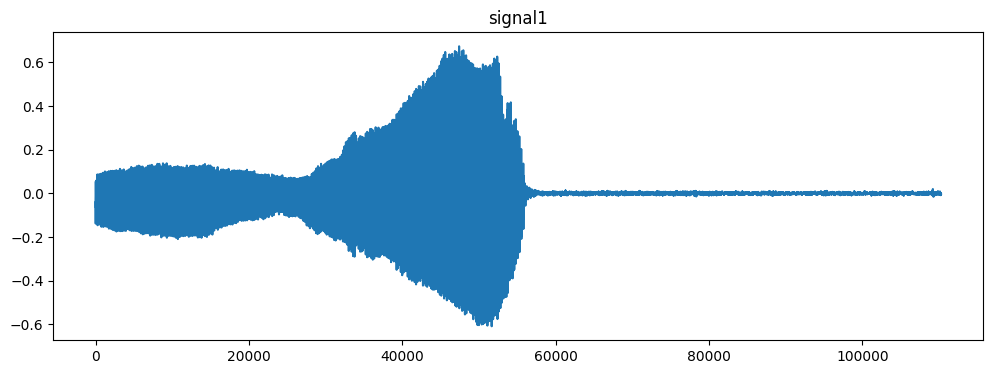

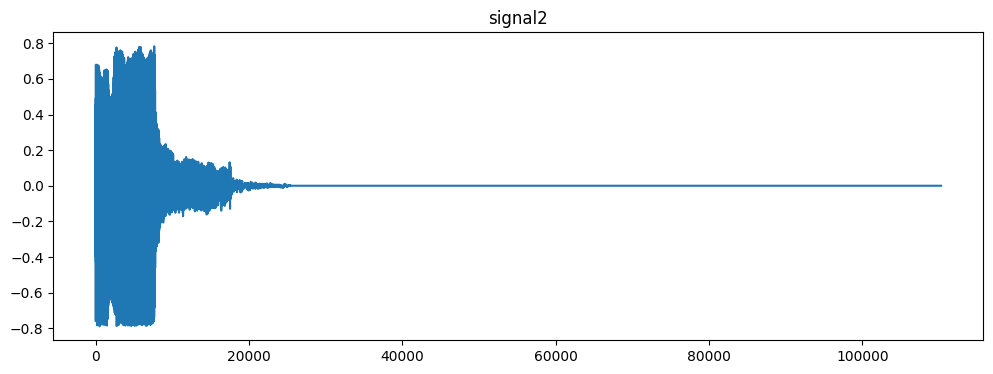

In [14]:
# Librosa audio with channels merged 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio1)
plt.title("signal1")

plt.figure(figsize=(12, 4))
plt.plot(librosa_audio2)
plt.title("signal2")

In [15]:
mfccs1 = librosa.feature.mfcc(y=librosa_audio1, sr=librosa_sample_rate1, n_mfcc=40)
mfccs2 = librosa.feature.mfcc(y=librosa_audio2, sr=librosa_sample_rate2, n_mfcc=40)
print(mfccs1.shape)
print(mfccs2.shape)

(40, 216)
(40, 216)


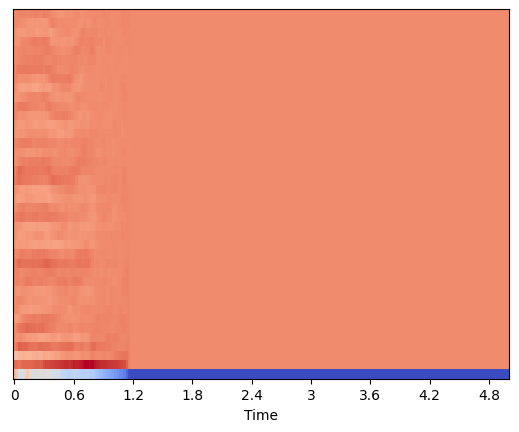

In [16]:
import librosa.display
librosa.display.specshow(mfccs1, sr=librosa_sample_rate1, x_axis='time')
librosa.display.specshow(mfccs2, sr=librosa_sample_rate2, x_axis='time')

In [17]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [18]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = 'animalsounds'

metadata = pd.read_csv('filtered_animalsounds.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["filename"]))
    
    class_label = row["category"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

Finished feature extraction from  200  files


In [151]:
import pandas as pd

metadata=pd.read_csv('filtered_animalsounds.csv')
metadata.head(200)

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-110389-A-0.wav,1,0,dog,True,110389,A
2,1-15689-A-4.wav,1,4,frog,False,15689,A
3,1-15689-B-4.wav,1,4,frog,False,15689,B
4,1-16568-A-3.wav,1,3,cow,False,16568,A
...,...,...,...,...,...,...,...
195,5-256452-A-5.wav,5,5,cat,False,256452,A
196,5-259169-A-5.wav,5,5,cat,False,259169,A
197,5-263831-A-6.wav,5,6,hen,False,263831,A
198,5-263831-B-6.wav,5,6,hen,False,263831,B


In [152]:
metadata['category'].value_counts()

category
dog     40
frog    40
cow     40
hen     40
cat     40
Name: count, dtype: int64

In [150]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

In [20]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [21]:
print("x_train:", x_train)
print("x_test:", x_test)
print("y_train:", y_train)
print("y_test:", y_test)
print("yy:", yy)
print("le:", le)


x_train: [[-3.60772339e+02  1.05554634e+02 -1.39640722e+01 ... -2.34782839e+00
   3.23621392e-01  2.56401509e-01]
 [-2.02149048e+02  1.36387039e+02 -5.04093704e+01 ... -9.14282382e-01
  -2.94159341e+00 -3.49963689e+00]
 [-3.21462250e+02  1.43877167e+02 -4.94590492e+01 ...  8.13634574e-01
   2.35759878e+00 -1.30784369e+00]
 ...
 [-3.00687744e+02  1.17461678e+02 -5.78308754e+01 ... -1.96199691e+00
   1.23956060e+00  1.28142011e+00]
 [-3.27235474e+02  1.14329163e+02 -3.60346484e+00 ...  1.68967032e+00
  -5.01966715e-01  1.91229331e+00]
 [-1.68799149e+02  1.57831024e+02 -7.79327698e+01 ...  8.96773994e-01
   1.97836936e+00 -2.32044816e+00]]
x_test: [[-5.34137390e+02  4.48857079e+01 -1.10101461e+01 ...  1.33192897e-01
  -4.18838322e-01 -6.62329048e-02]
 [-1.71512131e+02  8.43347702e+01 -6.38190460e+01 ... -4.63815117e+00
  -2.06276107e+00 -1.58611572e+00]
 [-2.12196609e+02  1.05109184e+02 -3.12800026e+01 ... -3.07283473e+00
  -1.67439592e+00 -2.61703181e+00]
 ...
 [-4.02430603e+02  9.930474

In [22]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [34]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
#from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
num_rows = 40
num_columns = 1
num_channels = 1
x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(2,1), input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,1)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=(2,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,1)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(2,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,1)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(2,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,1)))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())
model.add(Dense(num_labels, activation='softmax'))


In [35]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Pre-training accuracy: 30.0000%


In [38]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 39, 1, 16)           │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 19, 1, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 19, 1, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 18, 1, 32)           │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 9, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 9, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 1, 64)            │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 4, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 4, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 3, 1, 128)           │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,421 (87.58 KB)

 Trainable params: 22,421 (87.58 KB)

 Non-trainable params: 0 (0.00 B)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3042 - loss: 3.2543
Pre-training accuracy: 30.0000%


In [39]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 128

num_epochs = 72
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.animal_cnn.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/72
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1937 - loss: 7.1390
Epoch 1: val_loss improved from inf to 2.21127, saving model to saved_models/weights.best.animal_cnn.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1937 - loss: 7.1390 - val_accuracy: 0.1250 - val_loss: 2.2113
Epoch 2/72
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.2000 - loss: 6.6807
Epoch 2: val_loss improved from 2.21127 to 2.00996, saving model to saved_models/weights.best.animal_cnn.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.2000 - loss: 6.6807 - val_accuracy: 0.2250 - val_loss: 2.0100
Epoch 3/72
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.1937 - loss: 6.1016
Epoch 3: val_loss improved from 2.00996 to 1.88770, saving model to saved_models/weights.best.animal_cnn.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.1937 - loss: 6.1016 - val_accuracy: 0.2250 - val_loss: 1.8877
Epoch 4/72
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.2000 - loss: 4.9

In [40]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.643750011920929
Testing Accuracy:  0.5249999761581421


In [41]:
import numpy as np

def print_prediction(file_name):
    # Extract features from the audio file
    prediction_feature = extract_features(file_name) 
    if prediction_feature is None:
        print("Error in extracting features.")
        return

    # Reshape the features to match the input shape expected by the model
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    # Predict the probabilities for each class
    predicted_proba_vector = model.predict(prediction_feature)
    
    # Get the index of the highest probability
    predicted_class_index = np.argmax(predicted_proba_vector, axis=1)
    predicted_class = le.inverse_transform(predicted_class_index) 
    print("The predicted class is:", predicted_class[0], '\n')

    # Print the probability for each class
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f'))


In [42]:
print_prediction(filename1) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
The predicted class is: cow 

cat 		 :  0.17569929361343383789062500000000
cow 		 :  0.32801184058189392089843750000000
dog 		 :  0.12287416309118270874023437500000
frog 		 :  0.13691204786300659179687500000000
hen 		 :  0.23650267720222473144531250000000


In [43]:
print_prediction(filename2) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The predicted class is: cat 

cat 		 :  0.34714090824127197265625000000000
cow 		 :  0.14812852442264556884765625000000
dog 		 :  0.25331920385360717773437500000000
frog 		 :  0.05873697623610496520996093750000
hen 		 :  0.19267438352108001708984375000000


In [142]:
import sounddevice as sd
from scipy.io.wavfile import write

# Record parameters
duration = 5  # seconds
fs = 22050  # sample rate

# Recording signal 1
print("Recording Signal 1...")
signal_1 = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished
print("Recording Signal stopped")
write('signal_1.wav', fs, signal_1)  # Save as WAV file

Recording Signal 1...
Recording Signal stopped


In [143]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [144]:
audio_file_path='signal_1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
print(librosa_audio_data)

[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


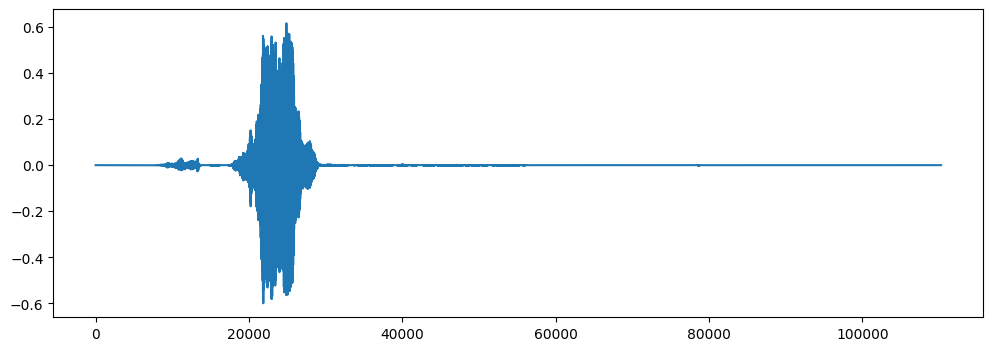

In [145]:
### Lets plot the librosa audio data
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [146]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 
wave_audio

array([ 0.0000000e+00,  0.0000000e+00, -3.0517578e-05, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

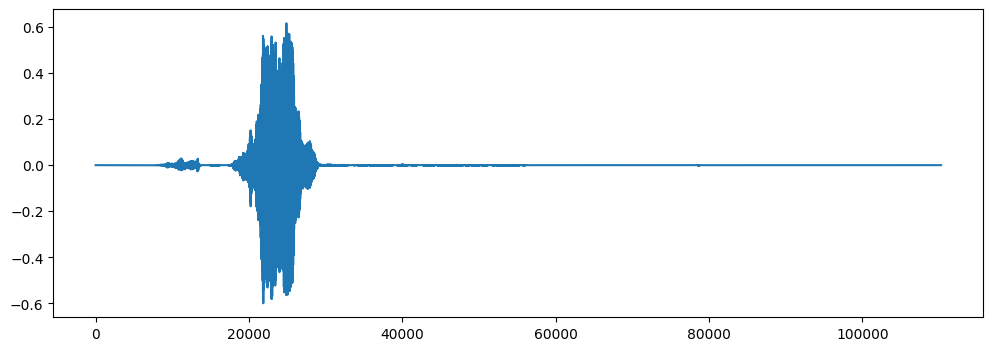

In [147]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [148]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)
mfccs

(40, 216)


array([[-599.79987, -599.79987, -599.79987, ..., -599.79987, -599.79987,
        -599.79987],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

In [149]:


filename = 'signal_1.wav' 
print_prediction(filename) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
The predicted class is: dog 

cat 		 :  0.32556912302970886230468750000000
cow 		 :  0.07197423279285430908203125000000
dog 		 :  0.43182992935180664062500000000000
frog 		 :  0.02589323185384273529052734375000
hen 		 :  0.14473357796669006347656250000000
